# Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab

In [2]:
from dicompylercore import dicomparser, dvh, dvhcalc

In [3]:
style_param = {'legend.fontsize': '18',
         'xtick.direction' : 'in',  
         'ytick.direction' : 'in', 
         'xtick.top' : True, 
         'figure.figsize': (10,6),
         'axes.labelsize': '18',
         'axes.titlesize':'26',
         'xtick.labelsize':'20',
         'ytick.labelsize':'20',
         'xtick.major.pad':'16',
         'ytick.major.pad':'16'}
    
pylab.rcParams.update(style_param)

# Read data

In [4]:
dose_pres = 55.8 
fraction=31.
dose_per_fr=dose_pres/fraction

In [5]:
path='data/pancreas_eclipse_angle_CCB'
dvh_eclipse_read = pd.read_csv(path+"/DVH_iCTV5580.txt", sep=" ",delimiter="\s+", header=None)

In [6]:
dvh_eclipse = dvh_eclipse_read.iloc[1:-1 , 0:3]
dvh_eclipse.reset_index(drop=True, inplace=True)
dvh_eclipse.rename(columns={dvh_eclipse.columns[0]:"Dose",
                            dvh_eclipse.columns[1]:"Relative_Dose",
                            dvh_eclipse.columns[2]:"Volume"},
                   inplace=True)
dvh_eclipse=dvh_eclipse.astype('float')
dvh_eclipse.Dose=dvh_eclipse.Dose/fraction/1.1

In [7]:
rs = path+"/RS.Patient07_Plan1.dcm"
rd = path+"/RD.Patient07_Plan1.dcm"

# Patient: Eclipse Data

Structure: iCTV_5580
Approval Status: Unapproved
Plan: Plan_MG1
Course: MG
Volume [cm³]: 76.0
Dose Cover.[%]: 100.0
Sampling Cover.[%]: 100.0
Min Dose [Gy]: 53.530
Max Dose [Gy]: 55.705
Mean Dose [Gy]: 55.116
Modal Dose [Gy]: 55.161
Median Dose [Gy]: 55.164
STD [Gy]: 0.239
Equiv. Sphere Diam. [cm]: 5.3
Conformity Index: 0.00
Gradient Measure [cm]: 4.10

In [8]:
dp = dicomparser.DicomParser(rs)
# i.e. Get a dict of structure information
structures = dp.GetStructures()
#structures

In [9]:
#choose structure from DICOM
for id, organ in structures.items():  
    
    for name, k in organ.items():
      if k == 'iCTV_5580':
        print(id)
        structure_id=id

28


<ipython-input-9-bd213d79ffae>:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if k == 'iCTV_5580':


In [10]:
# Access DVH data
# get structure Volume
calcdvh = dvhcalc.get_dvh(rs,rd,structure_id)
structure_volume=calcdvh.volume
print(" Max dose: ",calcdvh.max,"\n Min dose: ", calcdvh.min,"\n Mean dose: ",calcdvh.mean,"\n Dose in 2%Volume: ", calcdvh.D99cc, "\n Volume[cm^3]: ",calcdvh.volume)

 Max dose:  55.71 
 Min dose:  53.56 
 Mean dose:  55.12007396102372 
 Dose in 2%Volume:  0.00 Gy 
 Volume[cm^3]:  76.66199999999972


# DVH - volume_histogram() function

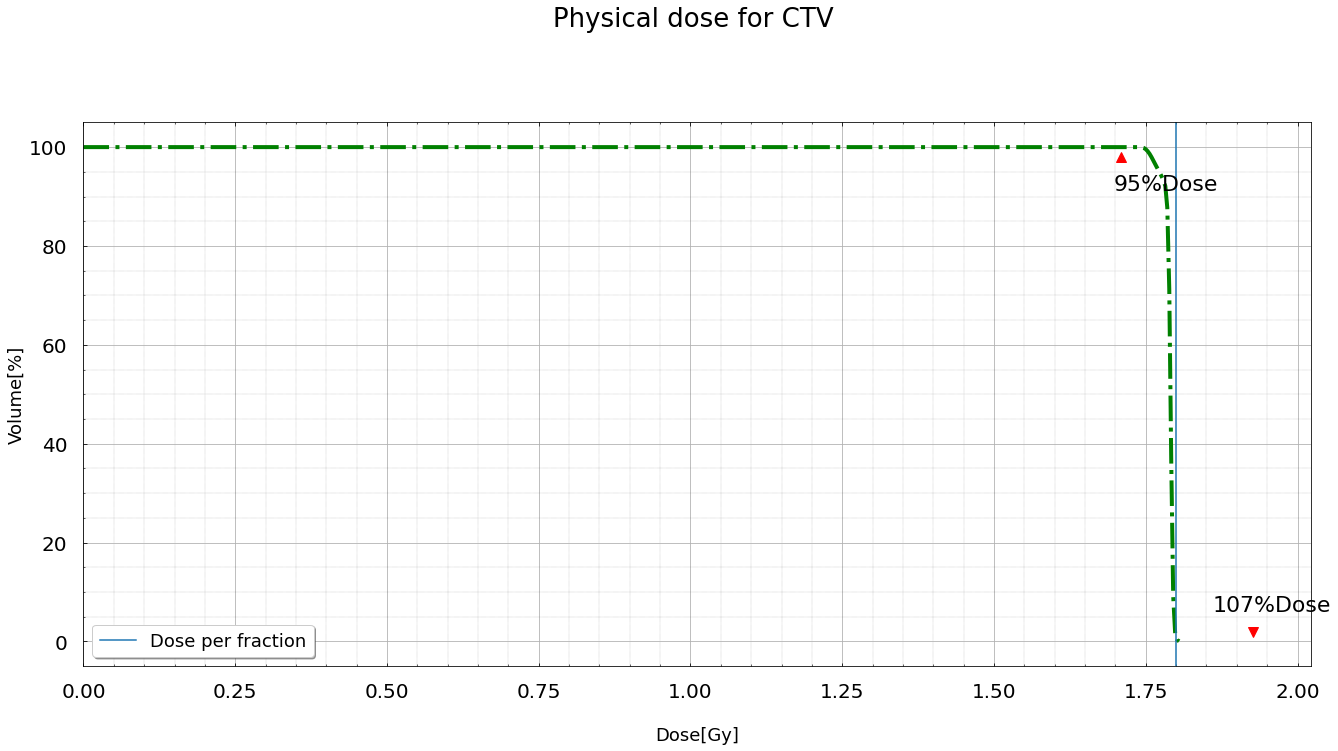

In [11]:
plt.figure(figsize=(22,10))

plt.plot(dvh_eclipse['Dose']*1.107, dvh_eclipse['Volume'], 'g-.', linewidth=4)

plt.plot(dose_per_fr*0.95,98,marker="^", markersize = 10, c='r')
plt.annotate(("95%Dose"),
             xy=(dose_per_fr*0.95,98), xycoords='data',
             fontsize=22,
             xytext=(-8, -33), textcoords='offset points')

plt.plot(dose_per_fr*1.07,2,marker="v", markersize = 10, c='r')
plt.annotate(("107%Dose"),
             xy=(dose_per_fr*1.07,2), xycoords='data',
             fontsize=22,
             xytext=(-40, 20), textcoords='offset points')

plt.axvline(dose_per_fr, label="Dose per fraction")

#Graph visualisation
plt.title("Physical dose for CTV "+"\n\n\n")
plt.ylabel("Volume[%]")
plt.xlabel("\nDose[Gy]")

plt.xlim(0,None)

plt.legend(loc='best',title_fontsize=28,fancybox=True, shadow=True,ncol=4)

plt.grid()
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')